In [133]:
### to know
### Theoretical knowledge of Deep Learning
### ANN (Artificial Neural Network with Pytorch)
### Feature Engineering {Categorical---Embedding Layer,Continous Variable}
### Pythonic Class to Create Feed Forward Neural Networks(will be working on linear regression)

1.Category Embedding

In [134]:
import pandas as pd

In [135]:
df=pd.read_csv('houseprice.csv',usecols=["SalePrice","MSSubClass","MSZoning","LotFrontage","LotArea","Street","YearBuilt","LotShape","1stFlrSF","2ndFlrSF"]).dropna()

In [136]:
df.shape

(1201, 10)

In [137]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,YearBuilt,1stFlrSF,2ndFlrSF,SalePrice
0,60,RL,65.0,8450,Pave,Reg,2003,856,854,208500
1,20,RL,80.0,9600,Pave,Reg,1976,1262,0,181500
2,60,RL,68.0,11250,Pave,IR1,2001,920,866,223500
3,70,RL,60.0,9550,Pave,IR1,1915,961,756,140000
4,60,RL,84.0,14260,Pave,IR1,2000,1145,1053,250000


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1201 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MSSubClass   1201 non-null   int64  
 1   MSZoning     1201 non-null   object 
 2   LotFrontage  1201 non-null   float64
 3   LotArea      1201 non-null   int64  
 4   Street       1201 non-null   object 
 5   LotShape     1201 non-null   object 
 6   YearBuilt    1201 non-null   int64  
 7   1stFlrSF     1201 non-null   int64  
 8   2ndFlrSF     1201 non-null   int64  
 9   SalePrice    1201 non-null   int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 103.2+ KB


In [139]:
### Dataset---> Features{Categorical , Continous}
### Pytorch ---> Tabular Dataset

### first we will handle Categorical Features ---> using Embedding Layers
### then Continous Features

In [140]:
### Length of unique values
for i in df.columns:
    print("Column name {} and unique values are {}".format(i,len(df[i].unique())))

Column name MSSubClass and unique values are 15
Column name MSZoning and unique values are 5
Column name LotFrontage and unique values are 110
Column name LotArea and unique values are 869
Column name Street and unique values are 2
Column name LotShape and unique values are 4
Column name YearBuilt and unique values are 112
Column name 1stFlrSF and unique values are 678
Column name 2ndFlrSF and unique values are 368
Column name SalePrice and unique values are 597


In [141]:
import datetime
datetime.datetime.now().year

2024

In [142]:
### replace the yearbuilt with difference in current year and the year table (Deriverd value)
df['Total Years']=datetime.datetime.now().year-df['YearBuilt']

In [143]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,YearBuilt,1stFlrSF,2ndFlrSF,SalePrice,Total Years
0,60,RL,65.0,8450,Pave,Reg,2003,856,854,208500,21
1,20,RL,80.0,9600,Pave,Reg,1976,1262,0,181500,48
2,60,RL,68.0,11250,Pave,IR1,2001,920,866,223500,23
3,70,RL,60.0,9550,Pave,IR1,1915,961,756,140000,109
4,60,RL,84.0,14260,Pave,IR1,2000,1145,1053,250000,24


In [144]:
### we can drop year build column
df.drop("YearBuilt",axis=1,inplace=True)

In [145]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', '1stFlrSF', '2ndFlrSF', 'SalePrice', 'Total Years'],
      dtype='object')

In [146]:
### Creating Categorical Features
cat_features=["MSSubClass","MSZoning","Street","LotShape"]
out_features="SalePrice"

In [147]:
### see my unique values
df["MSSubClass"].unique()

array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  80, 160,  75, 180,
        40,  85], dtype=int64)

In [148]:
### we will use label encoder ( we will sort and give index to all the values)
from sklearn.preprocessing import LabelEncoder
lbl_encoders={}
lbl_encoders["MSSubClass"] = LabelEncoder()
lbl_encoders["MSSubClass"].fit_transform(df["MSSubClass"])

array([5, 0, 5, ..., 6, 0, 0], dtype=int64)

In [149]:
lbl_encoders

{'MSSubClass': LabelEncoder()}

In [150]:
### we have to convert each and every categorical feature
from sklearn.preprocessing import LabelEncoder
lbl_encoders={}
for feature in cat_features:
    lbl_encoders[feature]=LabelEncoder()
    df[feature]=lbl_encoders[feature].fit_transform(df[feature])

In [151]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,1stFlrSF,2ndFlrSF,SalePrice,Total Years
0,5,3,65.0,8450,1,3,856,854,208500,21
1,0,3,80.0,9600,1,3,1262,0,181500,48
2,5,3,68.0,11250,1,0,920,866,223500,23
3,6,3,60.0,9550,1,0,961,756,140000,109
4,5,3,84.0,14260,1,0,1145,1053,250000,24
...,...,...,...,...,...,...,...,...,...,...
1455,5,3,62.0,7917,1,3,953,694,175000,25
1456,0,3,85.0,13175,1,3,2073,0,210000,46
1457,6,3,66.0,9042,1,3,1188,1152,266500,83
1458,0,3,68.0,9717,1,3,1078,0,142125,74


1.Categorical Features---
a) Label Encoding---Done
b) take all categorical features---{we will convert it to numpy then torch-->tensors}
c) Lets take all the continous values (continous variable will be conveted to numpy then tensors)
d) using embedding layer only for categorical features

In [152]:
### Staking and Converting Into Tensors
### adding it in columns
import numpy as np
cat_features=np.stack([df['MSSubClass'],df['MSZoning'],df['Street'],df['LotShape']],1)
cat_features

array([[5, 3, 1, 3],
       [0, 3, 1, 3],
       [5, 3, 1, 0],
       ...,
       [6, 3, 1, 3],
       [0, 3, 1, 3],
       [0, 3, 1, 3]], dtype=int64)

In [153]:
### convert this categorical data to tensors (numpy to tensors)
### Remember Categorical features cannot be convert to float
import torch
cat_features=torch.tensor(cat_features,dtype=torch.int64)
cat_features


tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        ...,
        [6, 3, 1, 3],
        [0, 3, 1, 3],
        [0, 3, 1, 3]])

In [154]:
### Create continous variable
cont_features=[]
for i in df.columns:
    if i in ["MSSubClass","MSZoning","Street","LotShape","SalePrice"]:
        pass
    else:
        cont_features.append(i)

In [155]:
cont_features

['LotFrontage', 'LotArea', '1stFlrSF', '2ndFlrSF', 'Total Years']

In [156]:
### Stacking continous variable to a tensor
cont_values = np.stack([df[i].values for i in cont_features],axis=1)  # simple list comprehension
cont_values = torch.tensor(cont_values,dtype=torch.float)
cont_values

tensor([[   65.,  8450.,   856.,   854.,    21.],
        [   80.,  9600.,  1262.,     0.,    48.],
        [   68., 11250.,   920.,   866.,    23.],
        ...,
        [   66.,  9042.,  1188.,  1152.,    83.],
        [   68.,  9717.,  1078.,     0.,    74.],
        [   75.,  9937.,  1256.,     0.,    59.]])

In [157]:
cont_values.dtype

torch.float32

In [158]:
### Dependent Feature
y = torch.tensor(df['SalePrice'].values,dtype=torch.float).reshape(-1,1)
y

tensor([[208500.],
        [181500.],
        [223500.],
        ...,
        [266500.],
        [142125.],
        [147500.]])

In [159]:
df.shape

(1201, 10)

In [160]:
cat_features.shape,cont_values.shape,y.shape

(torch.Size([1201, 4]), torch.Size([1201, 5]), torch.Size([1201, 1]))

In [161]:
len(df['MSSubClass'].unique())

15

# Embedding Size For Categorical columns

In [162]:
len(df["MSZoning"].unique()) ## important

5

In [163]:
### this will help the embedding layer to analyse what is will be the input (the input will be the length of this dimension) 
### based on this what will be the output
### This is only applicable for categorical features

In [164]:
cat_dims=[len(df[col].unique()) for col in ["MSSubClass","MSZoning","Street","LotShape"]]

In [165]:
cat_dims

[15, 5, 2, 4]

In [166]:
#### Thumb Rule Output dimension should be set based on the input dimension(min(50,feature dimension/2))
embedding_dim=[(x,min(50,(x+1)//2)) for x in cat_dims]
embedding_dim ## (input dimension,output dimension)

[(15, 8), (5, 3), (2, 1), (4, 2)]

In [167]:
#### above were the data preprocessing steps

In [168]:
import torch
import torch.nn as nn # all the models will be there
import torch.nn.functional as F # all activation function
### first step
embed_representation = nn.ModuleList([nn.Embedding(inp,out) for inp,out in embedding_dim])
embed_representation

ModuleList(
  (0): Embedding(15, 8)
  (1): Embedding(5, 3)
  (2): Embedding(2, 1)
  (3): Embedding(4, 2)
)

In [169]:
cat_features

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        ...,
        [6, 3, 1, 3],
        [0, 3, 1, 3],
        [0, 3, 1, 3]])

In [170]:
### take top 4 record ( converting this to vector with the help of embedding representation)
cat_featurez=cat_features[:4]
cat_featurez

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        [6, 3, 1, 0]])

In [171]:
pd.set_option('display.max_rows',500)
embedding_val=[]
for i,e in enumerate(embed_representation):
    embedding_val.append(e(cat_features[:,i])) ### take the entire column

In [172]:
embedding_val

[tensor([[ 1.1974,  0.5473, -1.9665,  ..., -0.2407, -0.0515,  0.8675],
         [-1.6206,  2.0558,  1.0856,  ..., -0.2119,  1.3279, -2.3539],
         [ 1.1974,  0.5473, -1.9665,  ..., -0.2407, -0.0515,  0.8675],
         ...,
         [-0.1784,  0.4795,  0.0224,  ..., -1.5468, -0.2749,  1.8423],
         [-1.6206,  2.0558,  1.0856,  ..., -0.2119,  1.3279, -2.3539],
         [-1.6206,  2.0558,  1.0856,  ..., -0.2119,  1.3279, -2.3539]],
        grad_fn=<EmbeddingBackward0>),
 tensor([[1.2226, 0.2905, 0.4870],
         [1.2226, 0.2905, 0.4870],
         [1.2226, 0.2905, 0.4870],
         ...,
         [1.2226, 0.2905, 0.4870],
         [1.2226, 0.2905, 0.4870],
         [1.2226, 0.2905, 0.4870]], grad_fn=<EmbeddingBackward0>),
 tensor([[-0.4402],
         [-0.4402],
         [-0.4402],
         ...,
         [-0.4402],
         [-0.4402],
         [-0.4402]], grad_fn=<EmbeddingBackward0>),
 tensor([[-0.4638, -1.5399],
         [-0.4638, -1.5399],
         [-1.0528, -0.8815],
         ..

In [173]:
### stacking is not done properly it should be column wise (first row of all the tensors one after another)
z=torch.cat(embedding_val,1)
z ### basically combining all the rows

tensor([[ 1.1974,  0.5473, -1.9665,  ..., -0.4402, -0.4638, -1.5399],
        [-1.6206,  2.0558,  1.0856,  ..., -0.4402, -0.4638, -1.5399],
        [ 1.1974,  0.5473, -1.9665,  ..., -0.4402, -1.0528, -0.8815],
        ...,
        [-0.1784,  0.4795,  0.0224,  ..., -0.4402, -0.4638, -1.5399],
        [-1.6206,  2.0558,  1.0856,  ..., -0.4402, -0.4638, -1.5399],
        [-1.6206,  2.0558,  1.0856,  ..., -0.4402, -0.4638, -1.5399]],
       grad_fn=<CatBackward0>)

In [174]:
#### Implement dropout
droput=nn.Dropout(.4) ### to avoid and prevent overfitting
### this indicate that 40% of the values have droped off

In [175]:
### some values will automatically become zero(0)
### Dropout is one of the regularization method
final_embed = droput(z)
final_embed

tensor([[ 0.0000,  0.0000, -3.2776,  ..., -0.7336, -0.7729, -0.0000],
        [-0.0000,  0.0000,  0.0000,  ..., -0.0000, -0.7729, -2.5665],
        [ 0.0000,  0.0000, -3.2776,  ..., -0.7336, -1.7547, -0.0000],
        ...,
        [-0.2973,  0.0000,  0.0373,  ..., -0.7336, -0.7729, -2.5665],
        [-2.7010,  3.4264,  1.8094,  ..., -0.7336, -0.7729, -0.0000],
        [-0.0000,  0.0000,  0.0000,  ..., -0.7336, -0.0000, -0.0000]],
       grad_fn=<MulBackward0>)

In [176]:
### all the above embeding steps should be performed inside neural network
##### Create a Feed Forward Neural Network
import torch
import torch.nn as nn
import torch.nn.functional as F
class FeedForwardNN(nn.Module):
    
    def __init__(self,embedding_dim,n_cont,out_sz,layers,p=0.5):
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(inp,out) for inp,out in embedding_dim])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)
        
        layerlist = []
        n_emb = sum((out for inp,out in embedding_dim))
        n_in = n_emb + n_cont
        ### layers = [100,50,...] in first hidden layer there will be 100 nodes and the second hidden layer there will be 50 nodes
        for i in layers:
            layerlist.append(nn.Linear(n_in,i))
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1],out_sz))
        self.layers = nn.Sequential(*layerlist)
    
    def forward(self,x_cat,x_cont):
        embeddings = []
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings,1)
        x = self.emb_drop(x)
        
        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x,x_cont],1) ### concatinating all the continous and the input features
        x = self.layers(x)
        return x

In [177]:
len(cont_features)

5

In [178]:
torch.manual_seed(100)
model=FeedForwardNN(embedding_dim,len(cont_features),1,[100,50],p=0.4)

In [179]:
model

FeedForwardNN(
  (embeds): ModuleList(
    (0): Embedding(15, 8)
    (1): Embedding(5, 3)
    (2): Embedding(2, 1)
    (3): Embedding(4, 2)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=19, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)

## Define Loss And Optimizer

In [180]:
model.parameters

<bound method Module.parameters of FeedForwardNN(
  (embeds): ModuleList(
    (0): Embedding(15, 8)
    (1): Embedding(5, 3)
    (2): Embedding(2, 1)
    (3): Embedding(4, 2)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=19, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)>

In [181]:
loss_function=nn.MSELoss() ### MSE = mean square loss, later we will add RMSE ( root mean square error )
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [182]:
df.shape

(1201, 10)

In [183]:
cont_values

tensor([[   65.,  8450.,   856.,   854.,    21.],
        [   80.,  9600.,  1262.,     0.,    48.],
        [   68., 11250.,   920.,   866.,    23.],
        ...,
        [   66.,  9042.,  1188.,  1152.,    83.],
        [   68.,  9717.,  1078.,     0.,    74.],
        [   75.,  9937.,  1256.,     0.,    59.]])

In [184]:
cont_values.shape

torch.Size([1201, 5])

In [185]:
### train test split
batch_size = 1200 # total size of all the data
#test_size = 1200*0.15 = 180
### we have to make split for categorical and continous data
test_size = int(batch_size*0.15)
train_categorical=cat_features[:batch_size-test_size]
test_categorical = cat_features[batch_size-test_size:batch_size]
train_cont = cont_values[:batch_size-test_size]
test_cont= cont_values[batch_size-test_size:batch_size]
y_train=y[:batch_size-test_size]
y_test=y[batch_size-test_size:batch_size]

In [186]:
len(train_categorical) ,len(test_categorical) ,len(train_cont),len(test_cont),len(y_train),len(y_test)

(1020, 180, 1020, 180, 1020, 180)

In [187]:
epochs=5000
final_losses=[]
for i in range(epochs):
    i=i+1
    y_pred=model(train_categorical,train_cont)
    loss = torch.sqrt(loss_function(y_pred,y_train)) ### RMSE
    final_losses.append(loss)
    if i%10==1:
        print("Epoch number: {} and the loss: {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward() ### backpropogation
    optimizer.step()

Epoch number: 1 and the loss: 200496.75
Epoch number: 11 and the loss: 200493.46875
Epoch number: 21 and the loss: 200489.140625
Epoch number: 31 and the loss: 200482.625
Epoch number: 41 and the loss: 200473.234375
Epoch number: 51 and the loss: 200461.375
Epoch number: 61 and the loss: 200446.421875
Epoch number: 71 and the loss: 200429.359375
Epoch number: 81 and the loss: 200407.953125
Epoch number: 91 and the loss: 200383.390625
Epoch number: 101 and the loss: 200355.28125
Epoch number: 111 and the loss: 200322.15625
Epoch number: 121 and the loss: 200291.109375
Epoch number: 131 and the loss: 200252.3125
Epoch number: 141 and the loss: 200206.0
Epoch number: 151 and the loss: 200163.578125
Epoch number: 161 and the loss: 200112.1875
Epoch number: 171 and the loss: 200059.359375
Epoch number: 181 and the loss: 200006.875
Epoch number: 191 and the loss: 199948.625
Epoch number: 201 and the loss: 199882.28125
Epoch number: 211 and the loss: 199815.765625
Epoch number: 221 and the lo

Epoch number: 1821 and the loss: 152260.5
Epoch number: 1831 and the loss: 152395.84375
Epoch number: 1841 and the loss: 151656.4375
Epoch number: 1851 and the loss: 150530.53125
Epoch number: 1861 and the loss: 150769.25
Epoch number: 1871 and the loss: 150768.453125
Epoch number: 1881 and the loss: 149182.484375
Epoch number: 1891 and the loss: 148392.234375
Epoch number: 1901 and the loss: 148612.96875
Epoch number: 1911 and the loss: 148876.96875
Epoch number: 1921 and the loss: 147781.21875
Epoch number: 1931 and the loss: 147335.375
Epoch number: 1941 and the loss: 146661.125
Epoch number: 1951 and the loss: 146506.78125
Epoch number: 1961 and the loss: 145939.921875
Epoch number: 1971 and the loss: 145555.125
Epoch number: 1981 and the loss: 145844.359375
Epoch number: 1991 and the loss: 144485.84375
Epoch number: 2001 and the loss: 144251.015625
Epoch number: 2011 and the loss: 142955.46875
Epoch number: 2021 and the loss: 142892.015625
Epoch number: 2031 and the loss: 142487.9

Epoch number: 3641 and the loss: 64550.3046875
Epoch number: 3651 and the loss: 62681.6953125
Epoch number: 3661 and the loss: 63939.2890625
Epoch number: 3671 and the loss: 61628.1796875
Epoch number: 3681 and the loss: 62782.140625
Epoch number: 3691 and the loss: 60720.296875
Epoch number: 3701 and the loss: 59796.79296875
Epoch number: 3711 and the loss: 61672.171875
Epoch number: 3721 and the loss: 59802.48046875
Epoch number: 3731 and the loss: 57493.2421875
Epoch number: 3741 and the loss: 58136.93359375
Epoch number: 3751 and the loss: 59294.6484375
Epoch number: 3761 and the loss: 58693.27734375
Epoch number: 3771 and the loss: 56902.6015625
Epoch number: 3781 and the loss: 56418.6875
Epoch number: 3791 and the loss: 56343.44921875
Epoch number: 3801 and the loss: 56374.39453125
Epoch number: 3811 and the loss: 55309.73046875
Epoch number: 3821 and the loss: 56594.3828125
Epoch number: 3831 and the loss: 54539.4453125
Epoch number: 3841 and the loss: 52821.73046875
Epoch numbe

Text(0.5, 0, 'epoch')

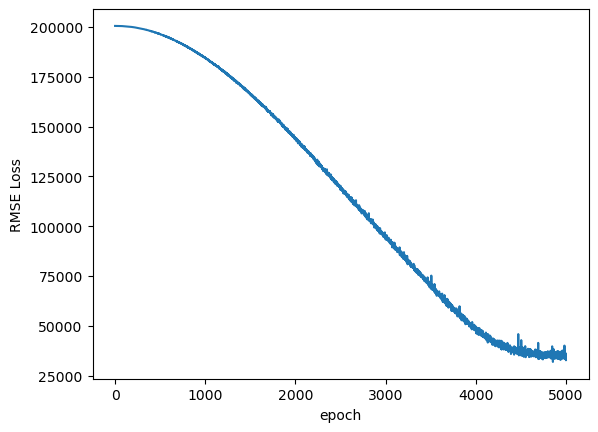

In [190]:
import matplotlib.pyplot as plt
%matplotlib inline

### detaching
new_loss = torch.tensor(final_losses,requires_grad=True)
# x = new_epochs.detach().numpy()
y = new_loss.detach().numpy()

plt.plot(range(epochs),y)
plt.ylabel('RMSE Loss')
plt.xlabel("epoch")

In [191]:
##### Validate the Test Data
y_pred=""
with torch.no_grad():
    y_pred=model(test_categorical,test_cont)
    loss=torch.sqrt(loss_function(y_pred,y_test))
print('RMSE: {}'.format(loss))

RMSE: 54028.2265625


In [192]:
data_verify=pd.DataFrame(y_test.tolist(),columns=["Test"])

In [193]:
data_predicted=pd.DataFrame(y_pred.tolist(),columns=["Prediction"])

In [194]:
data_predicted

,Prediction
0,98801.890625
1,203426.890625
2,152127.546875
3,236081.390625
4,226567.218750
5,195753.343750
6,155249.578125
7,298315.937500
8,139423.703125
9,374565.593750


In [196]:
final_output=pd.concat([data_verify,data_predicted],axis=1)
final_output['Difference']=final_output['Test']-final_output['Prediction']
final_output.head()

,Test,Prediction,Difference
0,130000.0,98801.890625,31198.109375
1,138887.0,203426.890625,-64539.890625
2,175500.0,152127.546875,23372.453125
3,195000.0,236081.390625,-41081.390625
4,142500.0,226567.218750,-84067.218750


In [197]:
### Save the Model
torch.save(model,'HousePrice.pt')

In [198]:
### save the weights of the model
torch.save(model.state_dict(),'HouseWeights.pt')

In [199]:
### Loading the saved Model
embs_size=[(15,8),(5,3),(2,1),(4,2)]
model1=FeedForwardNN(embs_size,5,1,[100,50],p=0.4)

In [200]:
model1.load_state_dict(torch.load('HouseWeights.pt'))

<All keys matched successfully>

In [201]:
model1.eval()

FeedForwardNN(
  (embeds): ModuleList(
    (0): Embedding(15, 8)
    (1): Embedding(5, 3)
    (2): Embedding(2, 1)
    (3): Embedding(4, 2)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=19, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)